In [16]:
def get_static_sol(filename):
    file = open(filename, 'r')
    X = []
    Y = []
    for line in file:
        aux1, aux2 = line.split()
        X.append(float(aux1))
        Y.append(float(aux2))
    file.close()
    return X, Y

def rmPoints(A):
    A = np.delete(A, [1, 2, 3])
    for i in range(0,int(len(A)/4)):
        index = i+4
        A = np.delete(A, [index-2, index-1, index])
    return A

r value: 0
r value = 0


/Users/creative-work/Dropbox/Projects/Current/Magnetic Field Detector/Agustin_Escobar/thesis/thesis/chapters/ch02/ch2/compreNumAnalytic/solution.py:117: RuntimeWarning: overflow encountered in cosh
  return 1/np.cosh(x)
/Users/creative-work/Dropbox/Projects/Current/Magnetic Field Detector/Agustin_Escobar/thesis/thesis/chapters/ch02/ch2/compreNumAnalytic/solution.py:140: RuntimeWarning: overflow encountered in cosh
  response = A * (self.xi_d - xi) + B/2 * (self.xi_d ** 2 - xi **2) + C/3 * (self.xi_d**3 - xi **3) + D * np.log(np.abs(np.cosh((self.xi_d-self.xi_0)/2)/np.abs(np.cosh((xi-self.xi_0)/2)))) + E * (self.xi_d * np.log(np.abs(np.cosh((self.xi_d-self.xi_0)/2))) - xi * np.log(np.abs(np.cosh((xi-self.xi_0)/2)))-self.IG(xi))
/Users/creative-work/Dropbox/Projects/Current/Magnetic Field Detector/Agustin_Escobar/thesis/thesis/chapters/ch02/ch2/compreNumAnalytic/solution.py:140: RuntimeWarning: divide by zero encountered in log
  response = A * (self.xi_d - xi) + B/2 * (self.xi_d ** 2 - 

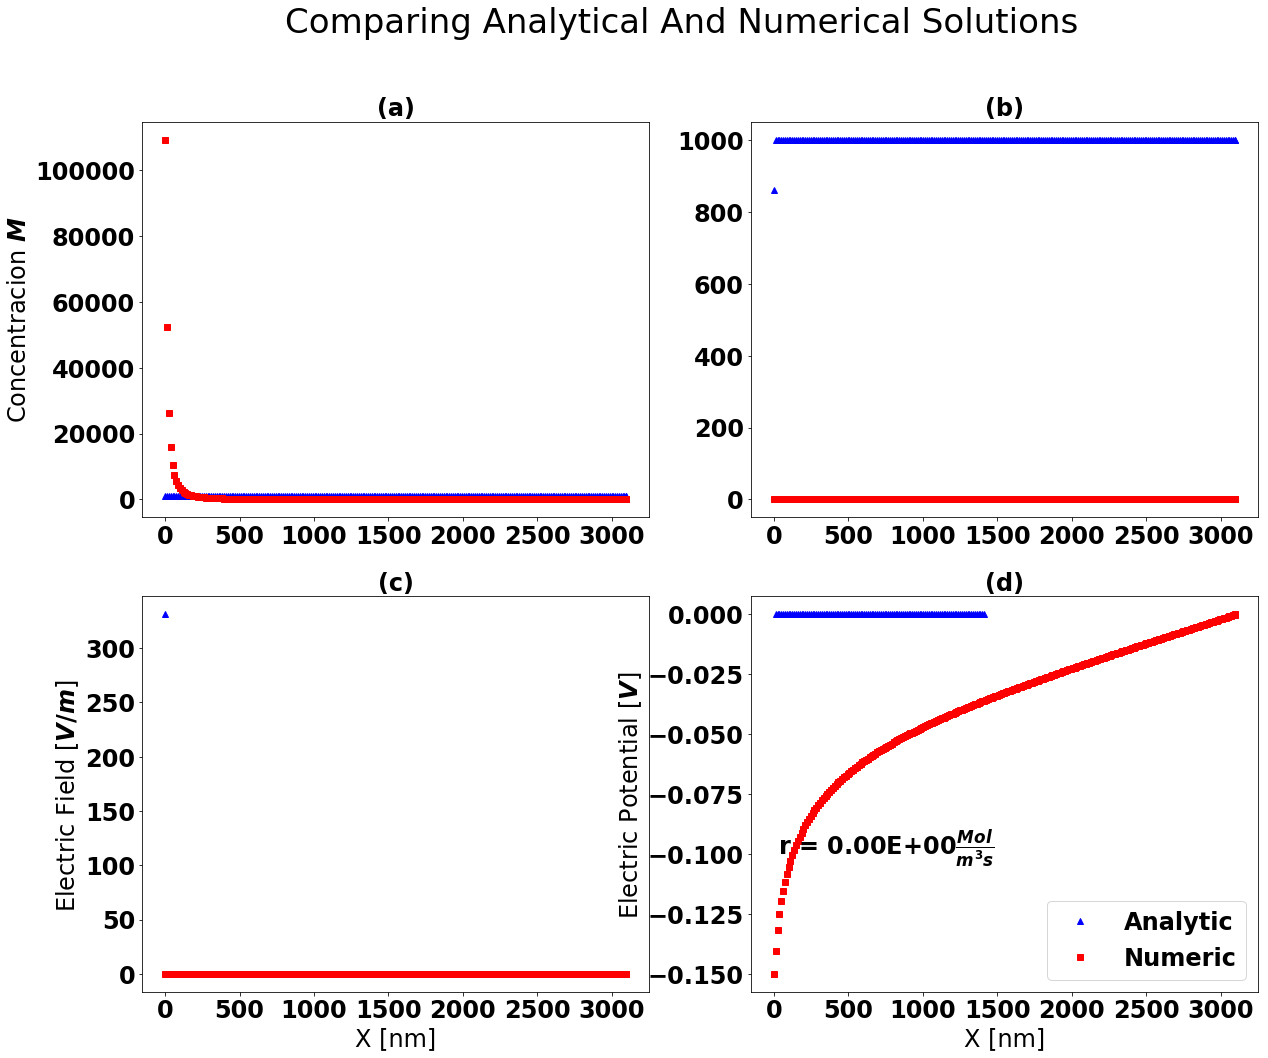

r value: 0.0008
r value = 0.0008


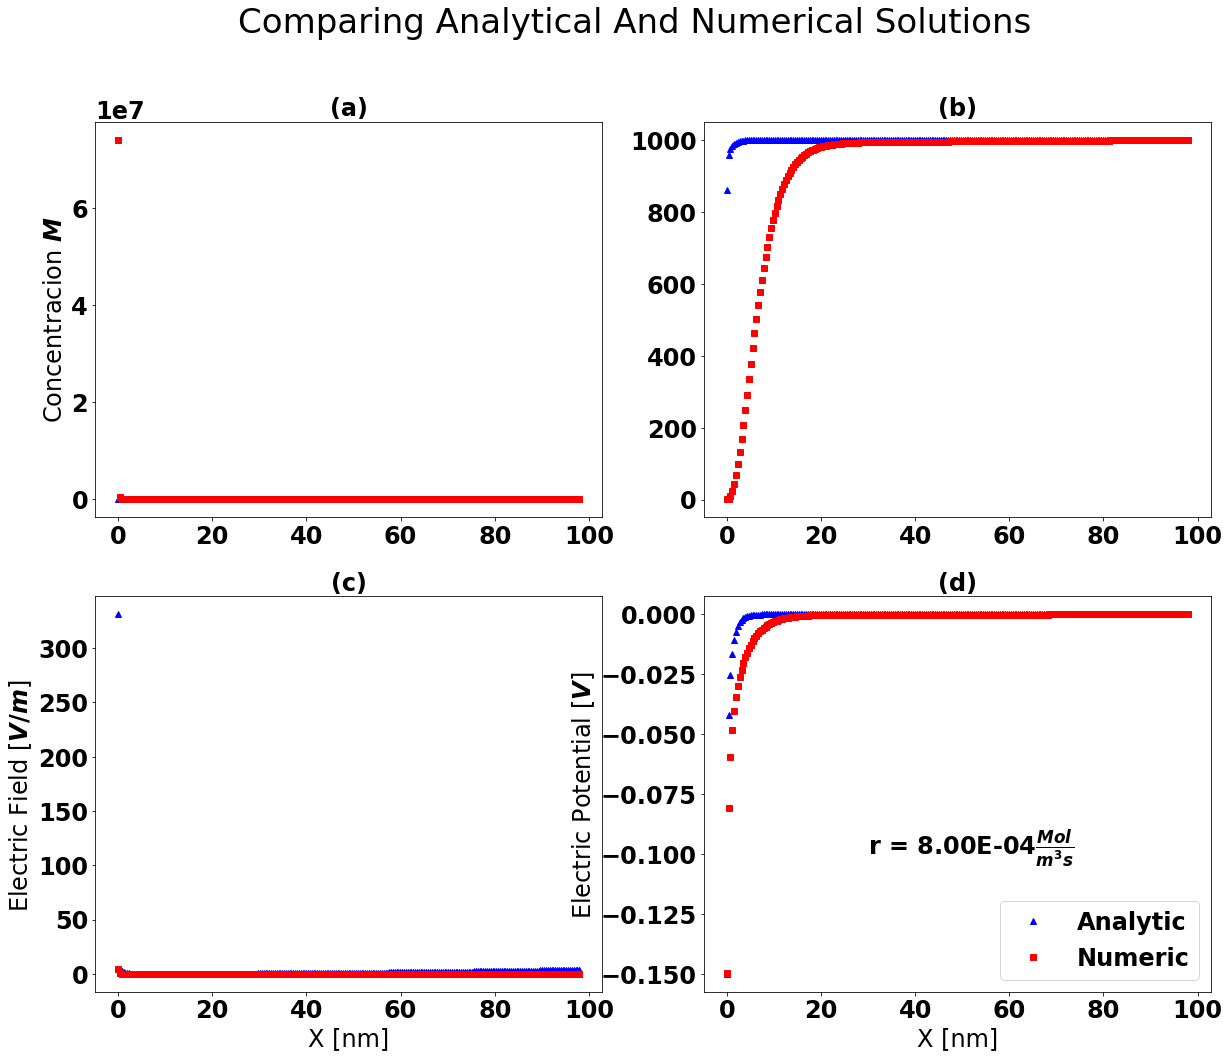

r value: 0.007
r value = 0.007


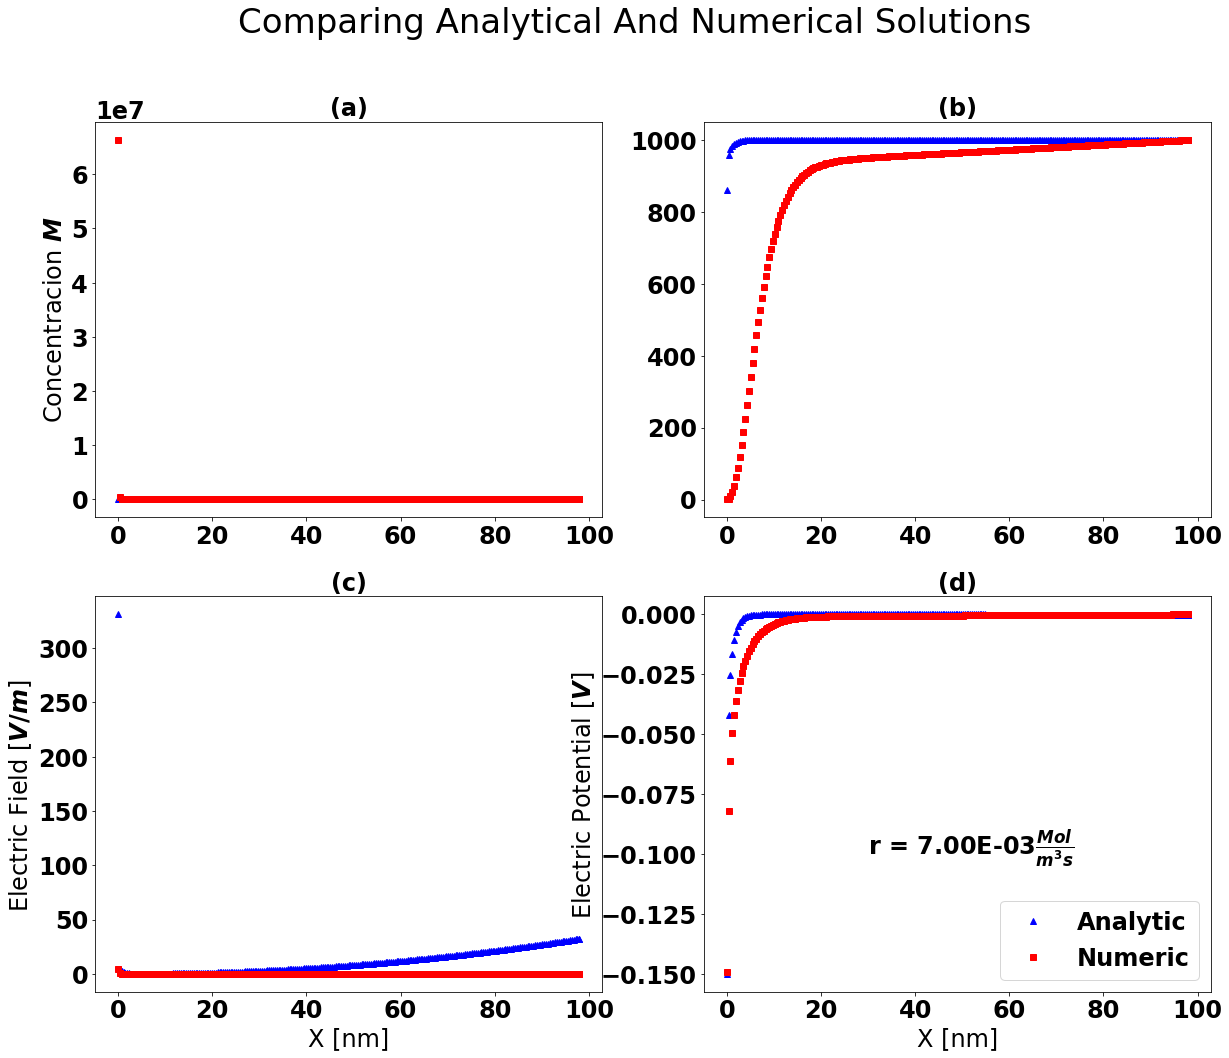

In [17]:
import matplotlib
import matplotlib.pyplot as plt
from decimal import Decimal
import solution as sol
import numpy as np

#analytic_concentration = sol.analytic_concentration
#analytic_concentration = sol.analytic_concentration
#analytic_potential = sol.analytic_potential
 
fs = 24
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : fs}

matplotlib.rc('font', **font)

import numpy as np
reactRate = [0, 8E-4, 7E-3]
mw = 6
anCp = []
anCm = []
for i in range(len(reactRate)):
    r0 = reactRate[i]
    numX, numCp = get_static_sol('../results/cp-num-r'+str(r0)+'.txt') 
    numX = np.array(numX)
    model =  sol.model()
    analytic_concentration = model.Cp_r
    analytic_potential = model.potential_r
    
    a, anCp, anCm = model.Cp_r(numX, r0)
#     = model.Cm0(numX)
    numX2, numCm = get_static_sol('../results/cm-num-r'+str(r0)+'.txt') 
    anE = model.Efield(numX, r0)
    anPhi = model.phi(numX, r0)
    numX3, numE = get_static_sol('../results/E-num-r' + str(r0) + '.txt') 
    #anX4, anPhi = get_static_sol('../results/potential1-A'+str(r0)+'.txt')
    numX4, numPhi = get_static_sol('../results/potential-num-r'+str(r0)+'.txt') 
    
    
    sigPsi = np.sqrt((np.array(anPhi)- np.array(numPhi))**2).sum()/np.sqrt(len(numPhi[1:-1]))
    sigE = np.sqrt((np.array(anE)- np.array(numE))**2).sum()/np.sqrt(len(numE[1:-1]))
    sigCp = np.sqrt((np.array(anCp)- np.array(numCp))**2).sum()/np.sqrt(len(numCp[1:-1]))
    sigCm = np.sqrt((np.array(anCm)- np.array(numCm))**2).sum()/np.sqrt(len(numCm[1:-1]))

    
    plt.figure(figsize=(20,16))
    plt.suptitle('Comparing Analytical And Numerical Solutions', fontsize=34)
    plt.subplot(2,2,1)
    plt.title(r'(a)', fontsize=fs, fontweight='bold')
    plt.ylabel(r'Concentracion $M$', fontsize=fs)
    #plt.text(65, 2.5, r'$\sigma$ =  %.3f'%sigCp, fontsize=fs)

    plt.plot(rmPoints(numX), 1e3*rmPoints(anCp), 'b^', linewidth=mw)
    plt.plot(rmPoints(numX), 1e3*rmPoints(numCp), 'rs', markersize=mw)

    
    plt.subplot(2,2,2)
    plt.title(r'(b)', fontsize=fs, fontweight='bold')
    plt.plot(rmPoints(numX), 1e3*rmPoints(anCm), 'b^', linewidth=mw)
    plt.plot(rmPoints(numX), 1e3*rmPoints(numCm), 'rs', markersize=mw)
    #plt.text(65, 0.2, r'$\sigma$ =  %.3f'%sigCm, fontsize=fs)

    plt.subplot(2,2,3)
    plt.title(r'(c)', fontsize=fs, fontweight='bold')
    plt.plot(rmPoints(numX), rmPoints(anE), 'b^', linewidth=mw)
    plt.plot(rmPoints(numX), rmPoints(numE), 'rs', markersize=mw)
    plt.xlabel('X [nm]', fontsize=fs)
    plt.ylabel(r'Electric Field [$V/m$] ', fontsize=fs)
    #plt.text(65, 1.5, r'$\sigma$ =  %.3f'%sigE, fontsize=fs)
    
    plt.subplot(2,2,4)
    plt.title(r'(d)', fontsize=fs, fontweight='bold')
    plt.plot(rmPoints(numX), rmPoints(anPhi), 'b^', linewidth=mw, label='Analytic')
    plt.plot(rmPoints(numX), rmPoints(numPhi), 'rs', markersize=mw, label='Numeric')
    plt.xlabel('X [nm]', fontsize=fs)
    plt.text(30, -0.10, 'r = '+str('%.2E' % Decimal(str(r0)))+r'$\frac{Mol}{m^3s}$', fontsize=fs)
    #plt.text(65, -0.08, r'$\sigma$ = %.3f'%sigPsi, fontsize=fs)
    plt.legend(prop={'size': 24})
    plt.ylabel(r'Electric Potential [$V$] ', fontsize=fs)
    plt.savefig('../../../../img/comparison'+str(i)+'.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')
    plt.show()
    

    #plt.plot(111)
    #plt.title(r'Porcentual Error', fontsize=fs)#, fontweight='bold')
    #plt.ylabel(r'Error', fontsize=fs*0.8)
    #Psi_sigma = np.abs((np.array(anPhi) - np.array(numPhi[1:-1]))/np.array(numPhi[1:-1]))
    #plt.plot(anX, Psi_sigma, 'b-', linewidth=mw*0.5, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
    #plt.ylim(0,1)
    #plt.xlabel('X [nm]', fontsize=fs*0.8)

#    plt.legend(prop={'size': 12})
#    plt.savefig('error.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')


In [18]:
aux = []
for i in range(len(numPhi)-1):
    aux.append(np.abs(anPhi[i] - numPhi[i]) / np.abs(numPhi[i]))

In [19]:
np.mean(aux) * 100

119.80067420723834

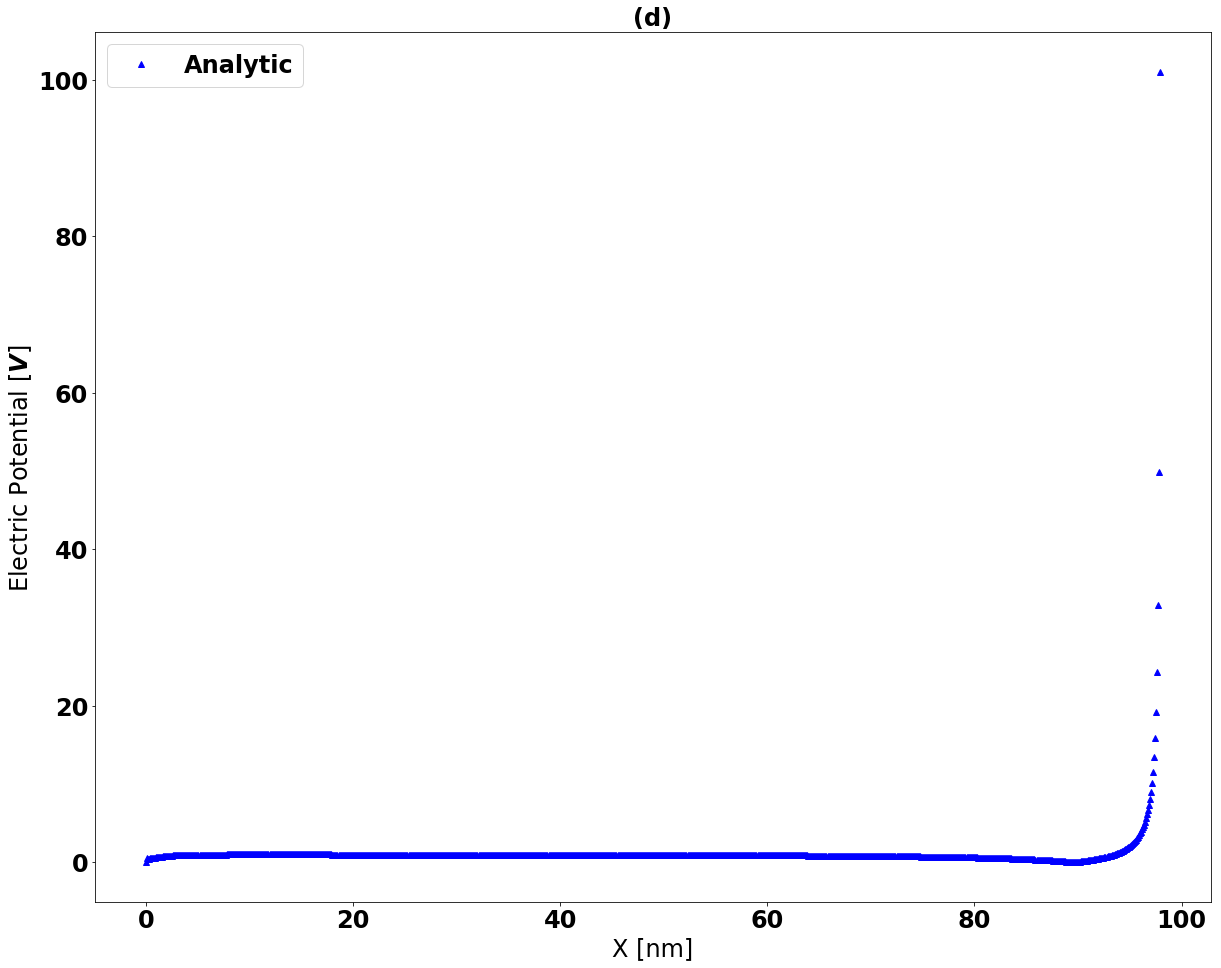

In [20]:

plt.figure(figsize=(20,16))
plt.title(r'(d)', fontsize=fs, fontweight='bold')
plt.plot(numX[:-1], aux, 'b^', linewidth=mw, label='Analytic')
plt.xlabel('X [nm]', fontsize=fs)
plt.legend(prop={'size': 24})
plt.ylabel(r'Electric Potential [$V$] ', fontsize=fs)
plt.savefig('../../../../img/comparison'+str(i)+'.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')
plt.show()


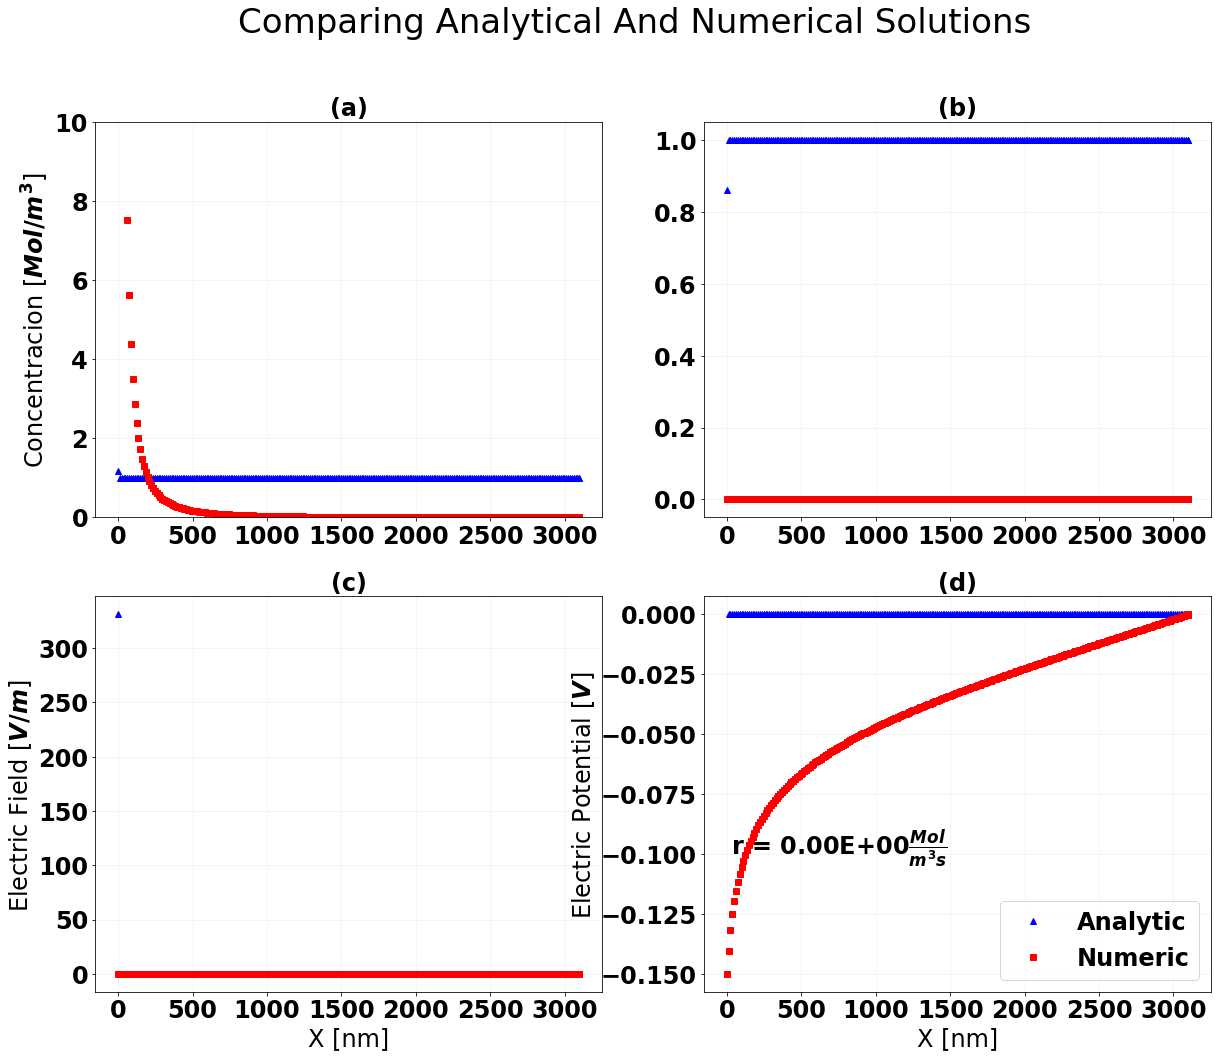

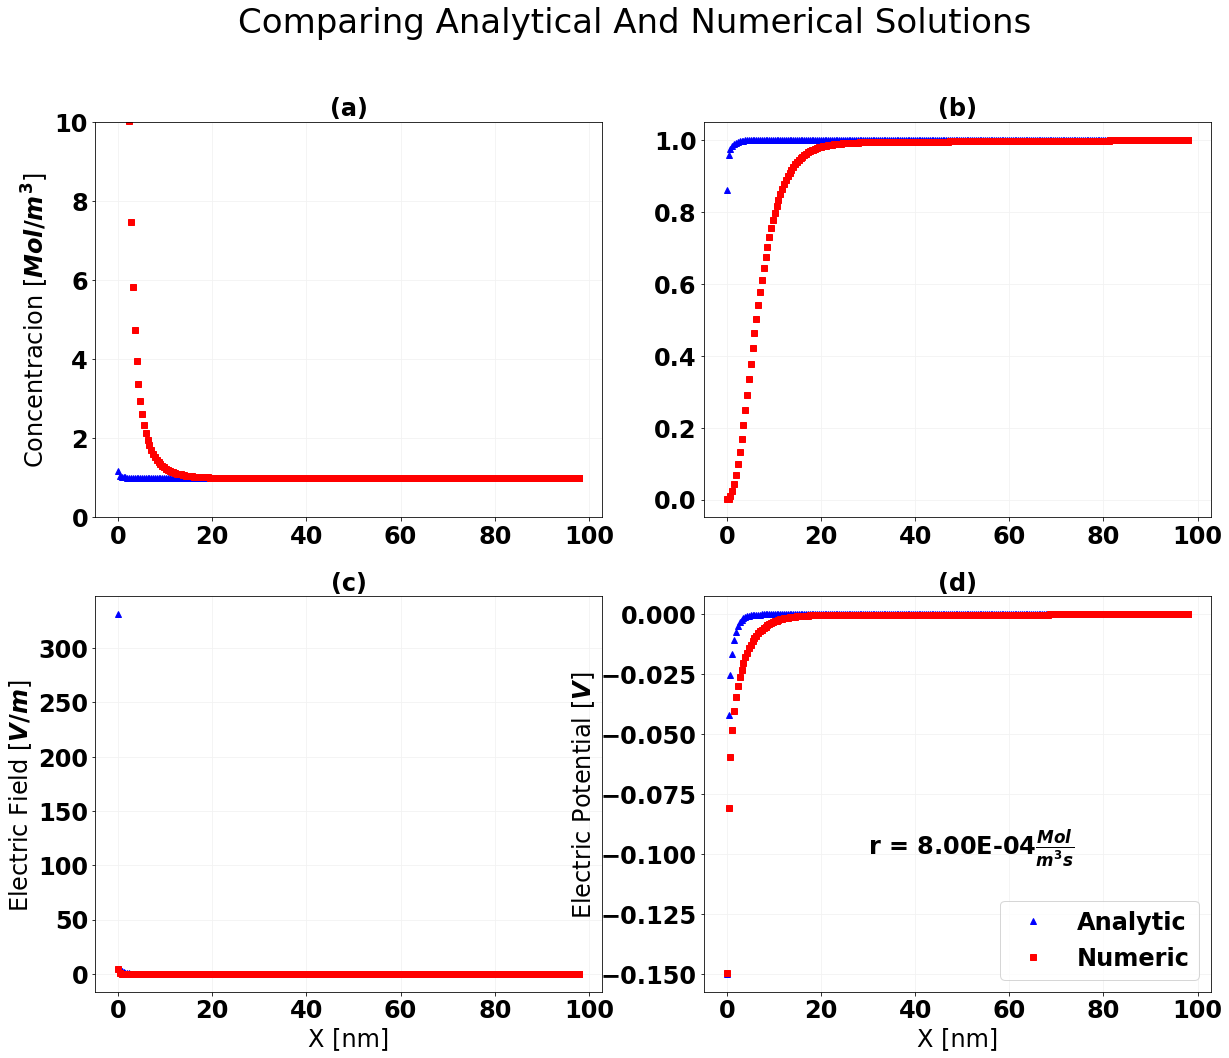

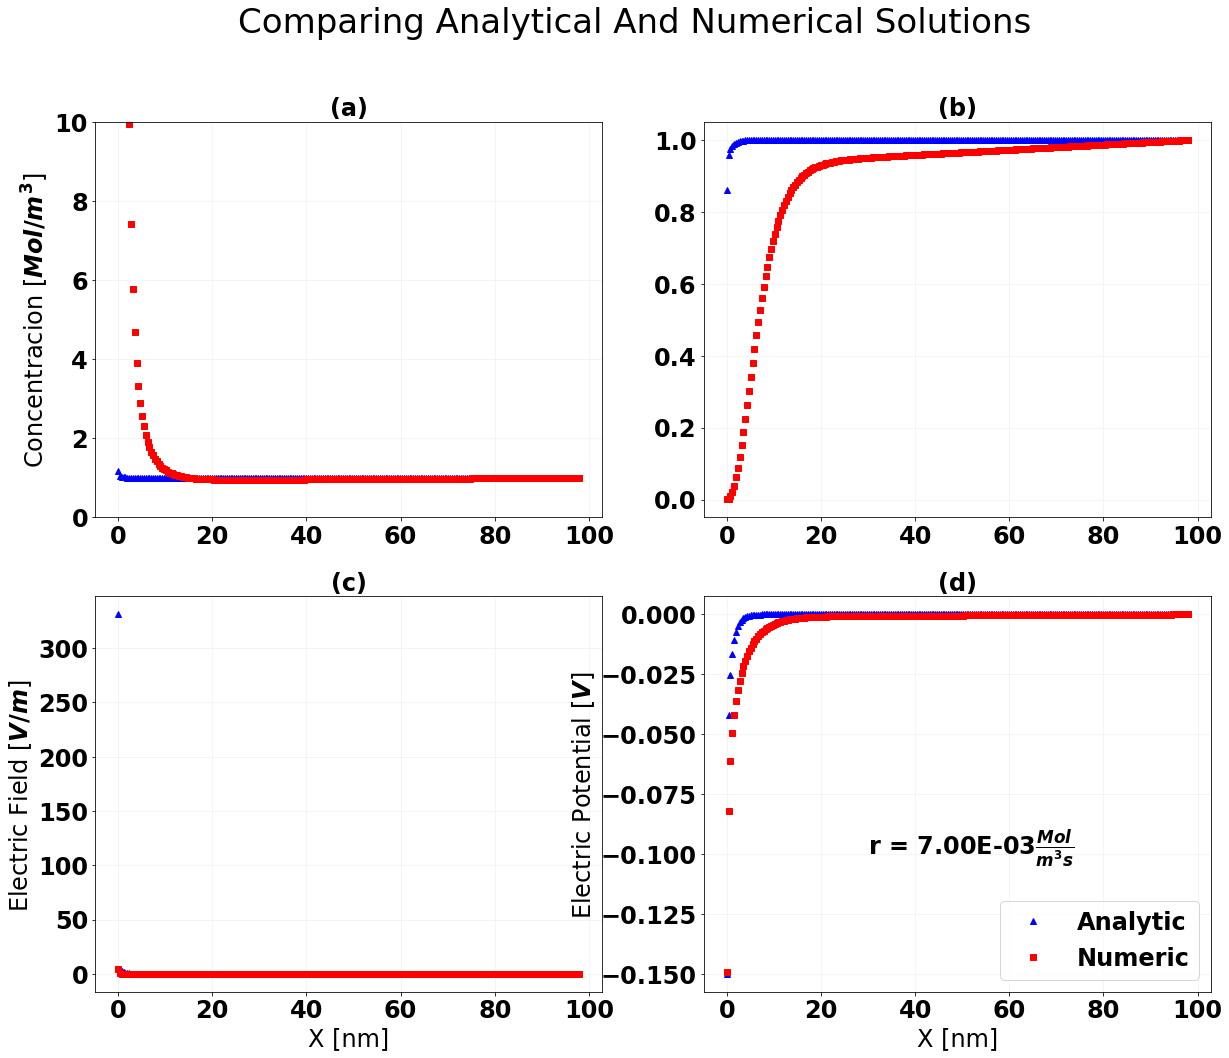

In [21]:
import matplotlib
import matplotlib.pyplot as plt
from decimal import Decimal
import solution as sol
import numpy as np

#analytic_concentration = sol.analytic_concentration
#analytic_concentration = sol.analytic_concentration
#analytic_potential = sol.analytic_potential
 
fs = 24

for i in range(len(reactRate)):
    r0 = reactRate[i]
    numX, numCp = get_static_sol('../results/cp-num-r'+str(r0)+'.txt') 
    numX = np.array(numX)
    model =  sol.model()
    
    anCp = model.C0(numX)
    anCm = model.Cm0(numX)
    anPhi = model.phi0(numX)
    anE = model.Efield0(numX)
    numX2, numCm = get_static_sol('../results/cm-num-r'+str(r0)+'.txt') 
    numX3, numE = get_static_sol('../results/E-num-r' + str(r0) + '.txt') 
    numX4, numPhi = get_static_sol('../results/potential-num-r'+str(r0)+'.txt')   
    
    plt.figure(figsize=(20,16))
    plt.suptitle('Comparing Analytical And Numerical Solutions', fontsize=34)
    plt.subplot(2,2,1)
    plt.grid(True, color= '#F2F2F2')
    plt.title(r'(a)', fontsize=fs, fontweight='bold')
    plt.ylabel(r'Concentracion [$Mol/m^3$]', fontsize=fs)
    #plt.text(65, 2.5, r'$\sigma$ =  %.3f'%sigCp, fontsize=fs)
    plt.plot(rmPoints(numX), rmPoints(anCp), 'b^', linewidth=mw)
    plt.plot(rmPoints(numX), rmPoints(numCp), 'rs', markersize=mw)
    plt.ylim(0,10)
    
    plt.subplot(2,2,2)
    plt.grid(True, color= '#F2F2F2')
    plt.title(r'(b)', fontsize=fs, fontweight='bold')
    plt.plot(rmPoints(numX), rmPoints(anCm), 'b^', linewidth=mw)
    plt.plot(rmPoints(numX), rmPoints(numCm), 'rs', markersize=mw)
    #plt.text(65, 0.2, r'$\sigma$ =  %.3f'%sigCm, fontsize=fs)

    plt.subplot(2,2,3)
    plt.grid(True, color= '#F2F2F2')
    plt.title(r'(c)', fontsize=fs, fontweight='bold')
    plt.plot(rmPoints(numX), rmPoints(anE), 'b^', linewidth=mw)
    plt.plot(rmPoints(numX), rmPoints(numE), 'rs', markersize=mw)
    plt.xlabel('X [nm]', fontsize=fs)
    plt.ylabel(r'Electric Field [$V/m$] ', fontsize=fs)
    #plt.text(65, 1.5, r'$\sigma$ =  %.3f'%sigE, fontsize=fs)
    
    plt.subplot(2,2,4)
    plt.grid(True, color= '#F2F2F2')
    plt.title(r'(d)', fontsize=fs, fontweight='bold')
    plt.plot(rmPoints(numX), rmPoints(anPhi), 'b^', linewidth=mw, label='Analytic')
    plt.plot(rmPoints(numX), rmPoints(numPhi), 'rs', markersize=mw, label='Numeric')
    plt.xlabel('X [nm]', fontsize=fs)
    plt.text(30, -0.10, 'r = '+str('%.2E' % Decimal(str(r0)))+r'$\frac{Mol}{m^3s}$', fontsize=fs)
    #plt.text(65, -0.08, r'$\sigma$ = %.3f'%sigPsi, fontsize=fs)
    plt.legend(prop={'size': 24})
    plt.ylabel(r'Electric Potential [$V$] ', fontsize=fs)
    plt.savefig('../../../../img/comparison'+str(i)+'.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')
    plt.show()
    

    #plt.plot(111)
    #plt.title(r'Porcentual Error', fontsize=fs)#, fontweight='bold')
    #plt.ylabel(r'Error', fontsize=fs*0.8)
    #Psi_sigma = np.abs((np.array(anPhi) - np.array(numPhi[1:-1]))/np.array(numPhi[1:-1]))
    #plt.plot(anX, Psi_sigma, 'b-', linewidth=mw*0.5, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
    #plt.ylim(0,1)
    #plt.xlabel('X [nm]', fontsize=fs*0.8)

#    plt.legend(prop={'size': 12})
#    plt.savefig('error.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')
